In [9]:
import pandas as pd
import matplotlib
import os
import re
import numpy as np

In [10]:
# 開くファイル指定

path = input("data folder path?")
if path == "" :
    path = "./"
if path[-1] != "/":
    path += "/"
    
_list = os.listdir(path)

csv_list = []
for name in _list:
    if re.fullmatch(".+\.csv", name):
        # 正規表現 csvファイルget
        csv_list.append(name)
for i, name in enumerate(csv_list):
    print(i, ":" ,name)

num = int(input("which csv file open? type num : "))
try:
    path = path + csv_list[num]
    print("open :", path)
except Exception:
    print("error")
    exit()

0 : hasc-200617-203613-gyro.csv
1 : hasc-200617-203613-acc.csv
2 : hasc-200611-183901-loc.csv
3 : hasc-200611-183901-gyro.csv
4 : hasc-200611-183901-acc.csv
open : ../../Desktop/dataset/hasc-200617-203613-acc.csv


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cf01fd0>],
      dtype=object)

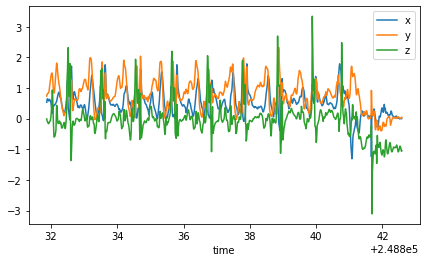

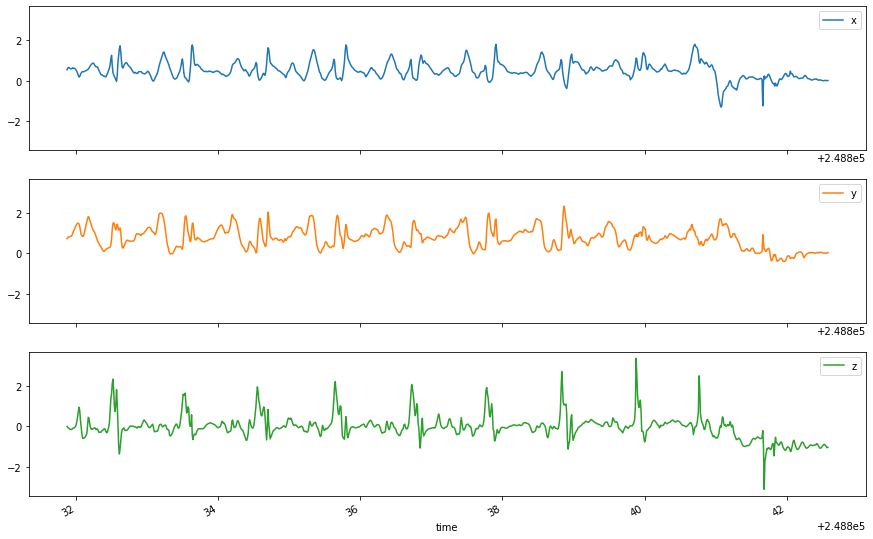

In [13]:
# フレームサイズ指定, numpy配列に格納
"""
frame_size = int( input ("frame size?") )
# data = np.loadtxt(path, delimiter=",").reshape(-1, frame_size, 3)
# ここはデータに応じて書き換える必要がある．
"""

# hasc で取ってきた個人の一つのデータならこれ
# data frame でやるパターン
data = pd.read_csv(path, header = None, names = ["time", "x", "y", "z"], index_col = 0)
data.head()
data.plot(figsize = (7, 4))
data.plot(subplots=True, layout=(3, 1),
        sharex=True, sharey=True,
         figsize = (15, 10))

(1076, 4)


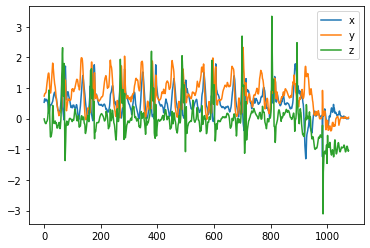

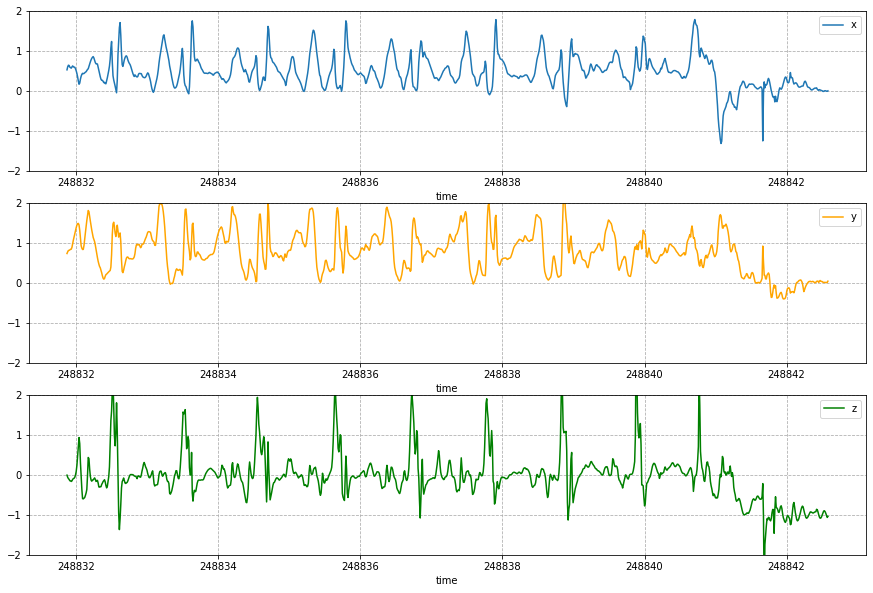

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
# np でやるパターン
numarray = np.loadtxt(path, delimiter=",")
print(numarray.shape)

plt.plot(numarray[:, 1], label = "x")
plt.plot(numarray[:, 2], label = "y")
plt.plot(numarray[:, 3], label = "z")
plt.legend()
plt.show()


plt.figure(figsize = (15, 10))
plt.subplot(3, 1, 1) # 1 of 3 * 1 graph 
plt.plot(numarray[:, 0], numarray[:, 1], label = "x")

plt.subplot(3, 1, 2)# 2 of 3 * 1 graph
plt.plot(numarray[:, 0],numarray[:, 2], label = "y", color = "orange")

plt.subplot(3, 1, 3) # 3 of 3 * 1 graph
plt.plot(numarray[:, 0],numarray[:, 3], label = "z", color = "green")

graphs = plt.gcf().get_axes()

for graph in graphs:
    # graph is Axes object
    graph.set_ylim(top=2, bottom=-2) # limit 
    graph.grid(linestyle="--") # backbround grid
    graph.get_xaxis().get_major_formatter().set_useOffset(False) # autoFormat x label
    graph.set_xlabel("time") # xlabel name
    graph.legend() # show label etc.

plt.show()

